# Characterizing deprived areas using GIS- AND RS-based features from open data sources

### 0. Introduction

This code was developed by Lorraine Oliveira during her MSc research 'EXPLORING THE DIVERSITY OF DEPRIVED AREAS: APPLICATIONS OF UNSUPERVISED MACHINE LEARNING AND OPEN GEODATA'

K-means algorithm is trained to test the capability of unsupervised models to capture area deprivation in the city of São Paulo, Brazil, poiting out the different living conditions across the city.

This code is used with several experiments each containing a different set of input features, to test the model robustness, its performance and interpretability. The processed features were derived with different extraction techniques and integrated into a single georeferenced table.

### 1. Import packages

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import os

In [6]:
# Set the working path
BASE_PATH = r"C:\Users\Lorra\Documents\ITC\THESIS\kernel511"
os.chdir(BASE_PATH)

### 2. Import data

In [7]:
# Read data
data = pd.read_csv('C:/Users/lorra/Documents/ITC/THESIS/kernel511/eovariables.csv')
data.head(5)

,grid_ID,OID_,O_IDD,ORIG_FID,BAND2,BAND3,BAND4,BAND5,BAND6,BAND7,...,UNPAVED,DENS_WATER,DIST_EDU,DIST_FINAN,DIST_GREEN,DIST_HEALTH,DIST_ROADS,DIST_WATER,NDVI,b5_5x5
0,1757749,1,1,0,523,759,823,1015,1853,2180,...,0.180448,0.662040,4037.92,15413.2,223.607,1104.54,940.213,382.099,0.456048,0.069375
1,1757750,2,2,1,479,700,703,1013,1670,2043,...,0.181737,0.684173,4019.20,15405.2,241.661,1089.77,932.309,367.696,0.504930,0.070625
2,1757751,3,3,2,466,736,737,1040,2053,2397,...,0.182896,0.701815,4000.50,15397.2,260.000,1075.17,924.770,353.836,0.532657,0.070625
3,1757752,4,4,3,292,649,529,1040,2348,2594,...,0.183916,0.717278,3981.81,15389.2,278.568,1060.75,917.606,340.588,0.695364,0.069375
4,1760110,9,5,4,472,625,592,821,1368,1441,...,0.170486,0.602388,4049.69,15402.9,196.977,1132.78,930.376,410.366,0.497667,0.075000


### 3. Data analysis and integration

In [8]:
# Check data descriptives
data.describe()

,grid_ID,OID_,O_IDD,ORIG_FID,BAND2,BAND3,BAND4,BAND5,BAND6,BAND7,...,UNPAVED,DENS_WATER,DIST_EDU,DIST_FINAN,DIST_GREEN,DIST_HEALTH,DIST_ROADS,DIST_WATER,NDVI,b5_5x5
count,1.499470e+05,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,...,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000
mean,5.246140e+06,104240.232195,74974.000000,74973.000000,794.896497,1007.717040,1139.503271,1327.788245,1583.283073,1686.485432,...,0.455171,0.680892,1685.043782,2996.119609,742.641446,2065.178968,381.727072,399.348970,0.229929,0.098824
std,1.485188e+06,60401.811915,43286.114744,43286.114744,283.194020,313.198458,393.364656,370.907360,427.548301,468.954102,...,0.785127,0.450923,1285.942876,2313.640013,634.868989,1565.189159,338.156657,387.167592,0.174052,0.015023
min,1.757749e+06,1.000000,1.000000,0.000000,40.000000,91.000000,63.000000,74.000000,81.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.269565,0.000000
25%,4.079378e+06,50512.500000,37487.500000,37486.500000,629.000000,816.000000,913.500000,1102.000000,1296.000000,1367.000000,...,0.017120,0.356704,778.974000,1325.750000,260.000000,839.524000,126.491000,113.137000,0.116230,0.090625
50%,5.198329e+06,105841.000000,74974.000000,74973.000000,799.000000,999.000000,1136.000000,1301.000000,1507.000000,1591.000000,...,0.147032,0.651570,1305.530000,2357.710000,580.000000,1601.620000,286.356000,312.410000,0.171814,0.097500
75%,6.603950e+06,155927.500000,112460.500000,112459.500000,964.000000,1190.000000,1361.000000,1520.000000,1801.000000,1926.000000,...,0.502100,0.942561,2243.210000,3931.920000,1056.220000,3054.770000,533.667000,575.847000,0.283093,0.105625
max,8.034449e+06,206619.000000,149947.000000,149946.000000,5472.000000,5866.000000,6671.000000,6397.000000,6195.000000,6483.000000,...,5.510610,2.753380,7106.330000,15413.200000,4067.280000,8835.590000,2014.050000,3188.480000,0.892258,0.226875


In [9]:
# Select input features according to specific model experiment -> this example reflects Model 5 including b5_5x5 (Sentinel Band 5)
data.iloc[:,12:37].describe()

,DEM,SLOPE,POP_COUNT,VIIRS,AREA_MN,PATCH_DENS,SHAPE_INDEX,MEAN,VARIANCE,HOMOGENEITY,...,UNPAVED,DENS_WATER,DIST_EDU,DIST_FINAN,DIST_GREEN,DIST_HEALTH,DIST_ROADS,DIST_WATER,NDVI,b5_5x5
count,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,...,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000
mean,787.435114,9.570164,177.747047,44.615066,0.840611,95.190967,0.959408,0.081951,7.018617,0.763648,...,0.455171,0.680892,1685.043782,2996.119609,742.641446,2065.178968,381.727072,399.348970,0.229929,0.098824
std,36.131290,6.177733,185.131269,19.559765,0.305361,28.627080,0.265402,0.013490,2.122515,0.079117,...,0.785127,0.450923,1285.942876,2313.640013,634.868989,1565.189159,338.156657,387.167592,0.174052,0.015023
min,714.000000,0.000000,0.000000,3.002610,0.000000,0.000000,0.000000,0.031250,0.926406,0.314353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.269565,0.000000
25%,763.000000,5.051150,39.218500,31.084400,0.840000,100.000000,1.000000,0.075000,5.824850,0.712000,...,0.017120,0.356704,778.974000,1325.750000,260.000000,839.524000,126.491000,113.137000,0.116230,0.090625
50%,783.000000,8.293810,137.441000,45.110500,1.000000,100.000000,1.000000,0.083125,7.028380,0.764000,...,0.147032,0.651570,1305.530000,2357.710000,580.000000,1601.620000,286.356000,312.410000,0.171814,0.097500
75%,806.000000,12.923900,249.891000,57.217600,1.000000,100.000000,1.000000,0.090625,8.166040,0.820000,...,0.502100,0.942561,2243.210000,3931.920000,1056.220000,3054.770000,533.667000,575.847000,0.283093,0.105625
max,1074.000000,46.073100,2202.910000,193.426000,1.000000,400.000000,2.125000,0.169375,33.772900,1.000000,...,5.510610,2.753380,7106.330000,15413.200000,4067.280000,8835.590000,2014.050000,3188.480000,0.892258,0.226875


In [6]:
# Check for missing values in the features
data.isnull().sum().sort_values(ascending=False)

grid_ID          0
MEAN             0
HOMOGENEITY      0
CONTRAST         0
DISSIMILARITY    0
ENTROPY          0
2ND_MOMENT       0
DEAD_END         0
UNPAVED          0
DENS_WATER       0
DIST_EDU         0
DIST_FINAN       0
DIST_GREEN       0
DIST_HEALTH      0
DIST_ROADS       0
DIST_WATER       0
NDVI             0
VARIANCE         0
SHAPE_INDEX      0
OID_             0
PATCH_DENS       0
O_IDD            0
ORIG_FID         0
BAND2            0
BAND3            0
BAND4            0
BAND5            0
BAND6            0
BAND7            0
BAND11           0
BAND12           0
DEM              0
SLOPE            0
POP_COUNT        0
VIIRS            0
AREA_MN          0
b5_5x5           0
dtype: int64

In [7]:
# Check data types  
data.dtypes

grid_ID            int64
OID_               int64
O_IDD              int64
ORIG_FID           int64
BAND2              int64
BAND3              int64
BAND4              int64
BAND5              int64
BAND6              int64
BAND7              int64
BAND11             int64
BAND12             int64
DEM                int64
SLOPE            float64
POP_COUNT        float64
VIIRS            float64
AREA_MN          float64
PATCH_DENS         int64
SHAPE_INDEX      float64
MEAN             float64
VARIANCE         float64
HOMOGENEITY      float64
CONTRAST         float64
DISSIMILARITY    float64
ENTROPY          float64
2ND_MOMENT       float64
DEAD_END         float64
UNPAVED          float64
DENS_WATER       float64
DIST_EDU         float64
DIST_FINAN       float64
DIST_GREEN       float64
DIST_HEALTH      float64
DIST_ROADS       float64
DIST_WATER       float64
NDVI             float64
b5_5x5           float64
dtype: object

In [8]:
# Depending on the data used, some features need to be transformed to floating type 
data[['DEM', 'PATCH_DENS']] = data[['DEM', 'PATCH_DENS']].astype(float)
data.dtypes

grid_ID            int64
OID_               int64
O_IDD              int64
ORIG_FID           int64
BAND2              int64
BAND3              int64
BAND4              int64
BAND5              int64
BAND6              int64
BAND7              int64
BAND11             int64
BAND12             int64
DEM              float64
SLOPE            float64
POP_COUNT        float64
VIIRS            float64
AREA_MN          float64
PATCH_DENS       float64
SHAPE_INDEX      float64
MEAN             float64
VARIANCE         float64
HOMOGENEITY      float64
CONTRAST         float64
DISSIMILARITY    float64
ENTROPY          float64
2ND_MOMENT       float64
DEAD_END         float64
UNPAVED          float64
DENS_WATER       float64
DIST_EDU         float64
DIST_FINAN       float64
DIST_GREEN       float64
DIST_HEALTH      float64
DIST_ROADS       float64
DIST_WATER       float64
NDVI             float64
b5_5x5           float64
dtype: object

In [9]:
data.shape

(149947, 37)

In [10]:
# Normalize the input features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [11]:
# Get column names first
names = data.columns
df = pd.DataFrame(data, columns=names)
df.iloc[:,12:37] = StandardScaler().fit_transform(df.iloc[:,12:37])  
print(df)

        grid_ID    OID_   O_IDD  ORIG_FID  BAND2  BAND3  BAND4  BAND5  BAND6  \
0       1757749       1       1         0    523    759    823   1015   1853   
1       1757750       2       2         1    479    700    703   1013   1670   
2       1757751       3       3         2    466    736    737   1040   2053   
3       1757752       4       4         3    292    649    529   1040   2348   
4       1760110       9       5         4    472    625    592    821   1368   
...         ...     ...     ...       ...    ...    ...    ...    ...    ...   
149942  8032085  200840  149943    149942    252    443    377    753   2002   
149943  8032086  200841  149944    149943    303    476    383    959   2406   
149944  8032087  200842  149945    149944    483    758    765   1104   2326   
149945  8032088  200843  149946    149945    428    668    669   1234   2052   
149946  8034449  200849  149947    149946    361    595    485    913   2264   

        BAND7  ...   UNPAVED  DENS_WATE

In [70]:
# Describe normalized dataset
data.iloc[:,12:37].describe()

,DEM,SLOPE,POP_COUNT,VIIRS,AREA_MN,PATCH_DENS,SHAPE_INDEX,MEAN,VARIANCE,HOMOGENEITY,...,UNPAVED,DENS_WATER,DIST_EDU,DIST_FINAN,DIST_GREEN,DIST_HEALTH,DIST_ROADS,DIST_WATER,NDVI,b5_5x5
count,1.499470e+05,149947.000000,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,...,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05
mean,7.854746e-16,0.000000,-8.264164e-17,-6.429368e-16,-4.276136e-16,1.224461e-16,-3.593774e-16,1.167597e-16,-1.364724e-17,-1.958758e-15,...,-3.032721e-18,1.819632e-17,5.458897e-17,4.003191e-16,-8.794890e-17,4.245809e-17,-1.516360e-18,2.426176e-17,-1.031125e-16,7.505983e-17
std,1.000003e+00,1.000003,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.032459e+00,-1.549144,-9.601168e-01,-2.127459e+00,-2.752854e+00,-3.325218e+00,-3.614939e+00,-3.758466e+00,-2.870289e+00,-5.678913e+00,...,-5.797446e-01,-1.510002e+00,-1.310361e+00,-1.294985e+00,-1.169759e+00,-1.319448e+00,-1.128851e+00,-1.031466e+00,-2.869812e+00,-6.577980e+00
25%,-6.762890e-01,-0.731503,-7.482745e-01,-6.917625e-01,-2.002425e-03,1.679895e-01,1.529478e-01,-5.153064e-01,-5.624322e-01,-6.528100e-01,...,-5.579395e-01,-7.189457e-01,-7.045980e-01,-7.219685e-01,-7.602247e-01,-7.830741e-01,-7.547890e-01,-7.392481e-01,-6.532519e-01,-5.457197e-01
50%,-1.227504e-01,-0.206606,-2.177168e-01,2.532934e-02,5.219692e-01,1.679895e-01,1.529478e-01,8.699467e-02,4.599787e-03,4.449756e-03,...,-3.924723e-01,-6.502655e-02,-2.951259e-01,-2.759339e-01,-2.561820e-01,-2.961690e-01,-2.820332e-01,-2.245520e-01,-3.338977e-01,-8.809991e-02
75%,5.138191e-01,0.542877,3.896921e-01,6.443112e-01,5.219692e-01,1.679895e-01,1.529478e-01,6.429649e-01,5.405977e-01,7.122679e-01,...,5.977214e-02,5.802991e-01,4.340536e-01,4.044724e-01,4.939280e-01,6.322522e-01,4.493197e-01,4.558714e-01,3.054513e-01,4.527234e-01
max,7.931238e+00,5.908811,1.093910e+01,7.608038e+00,5.219692e-01,1.064761e+01,4.391820e+00,6.480652e+00,1.260503e+01,2.987398e+00,...,6.439031e+00,4.596121e+00,4.215820e+00,5.366920e+00,5.236749e+00,4.325633e+00,4.827137e+00,7.203961e+00,3.805366e+00,8.523472e+00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'DEM'),
  Text(1, 0, 'SLOPE'),
  Text(2, 0, 'POP_COUNT'),
  Text(3, 0, 'VIIRS'),
  Text(4, 0, 'AREA_MN'),
  Text(5, 0, 'PATCH_DENS'),
  Text(6, 0, 'SHAPE_INDEX'),
  Text(7, 0, 'MEAN'),
  Text(8, 0, 'VARIANCE'),
  Text(9, 0, 'HOMOGENEITY'),
  Text(10, 0, 'CONTRAST'),
  Text(11, 0, 'DISSIMILARITY'),
  Text(12, 0, 'ENTROPY'),
  Text(13, 0, '2ND_MOMENT'),
  Text(14, 0, 'DEAD_END'),
  Text(15, 0, 'UNPAVED'),
  Text(16, 0, 'DENS_WATER'),
  Text(17, 0, 'DIST_EDU'),
  Text(18, 0, 'DIST_FINAN'),
  Text(19, 0, 'DIST_GREEN'),
  Text(20, 0, 'DIST_HEALTH'),
  Text(21, 0, 'DIST_ROADS'),
  Text(22, 0, 'DIST_WATER'),
  Text(23, 0, 'NDVI'),
  Text(24, 0, 'b5_5x5')])

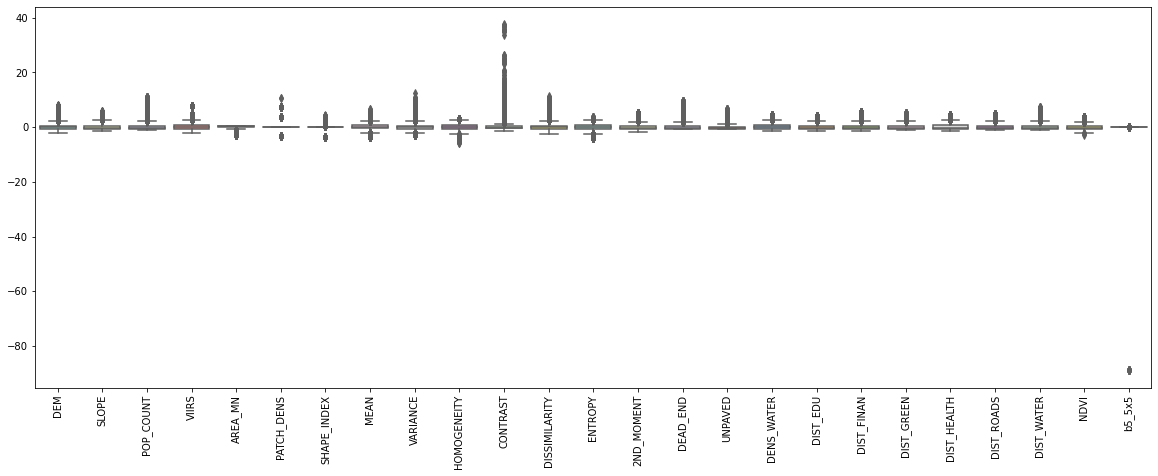

In [32]:
# Visualize dataset with boxplots
import seaborn as sns
plt.figure(figsize=(20,7))
sns.boxplot(data=df.iloc[:,12:37], palette='Set3')
plt.xticks(rotation=90)

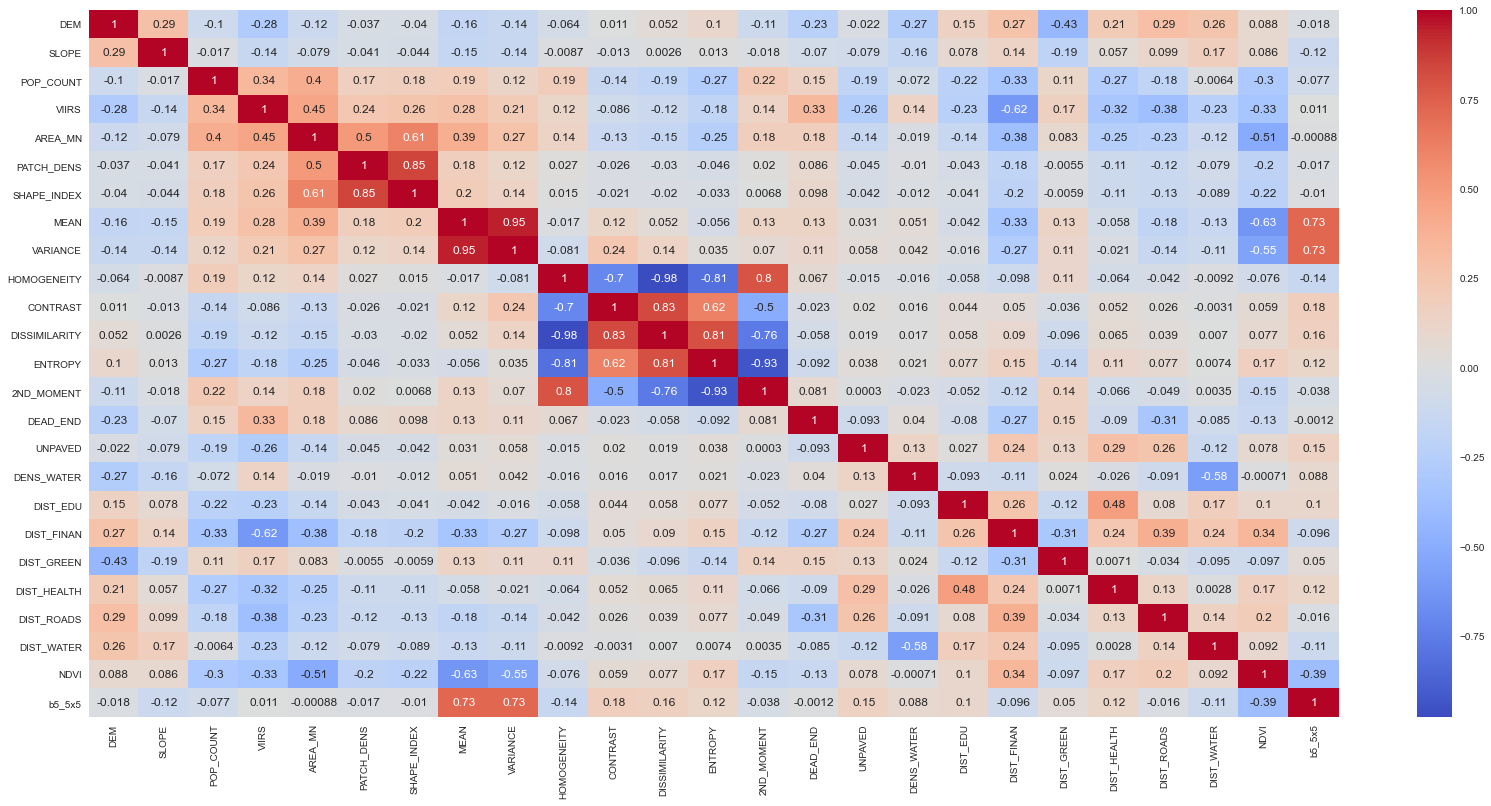

In [71]:
# Calculate Pearson Correlation Matrix
plt.figure(figsize=(28,13))
cor = data.iloc[:,12:37].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()
fig = plt.figure()
fig.savefig('correlation_all.png', dpi=300)

In [20]:
# Remove outliers 
from scipy import stats
z_scores = stats.zscore(data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)
new_df = data[filtered_entries]

print(new_df)

        grid_ID    OID_   O_IDD  ORIG_FID  BAND2  BAND3  BAND4  BAND5  BAND6  \
882     2001315    1168     883       882    636    817    874   1082   1552   
883     2003677    1173     884       883    704    904    949   1063   1542   
884     2003678    1174     885       884    555    681    733    901   1023   
885     2003679    1175     886       885    610    774    825    951   1253   
886     2003680    1176     887       886    426    686    917   1015   1734   
...         ...     ...     ...       ...    ...    ...    ...    ...    ...   
149695  8002821  122169  149696    149695    398    708    764   1272   2026   
149724  8005169  122176  149725    149724    783   1058   1225   1494   1909   
149725  8005170  122177  149726    149725   1044   1418   1583   1712   2134   
149726  8005171  122178  149727    149726    844   1051   1171   1281   1595   
149727  8005172  122179  149728    149727    639    885    936   1058   1494   

        BAND7  ...   UNPAVED  DENS_WATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'DEM'),
  Text(1, 0, 'SLOPE'),
  Text(2, 0, 'POP_COUNT'),
  Text(3, 0, 'VIIRS'),
  Text(4, 0, 'AREA_MN'),
  Text(5, 0, 'PATCH_DENS'),
  Text(6, 0, 'SHAPE_INDEX'),
  Text(7, 0, 'MEAN'),
  Text(8, 0, 'VARIANCE'),
  Text(9, 0, 'HOMOGENEITY'),
  Text(10, 0, 'CONTRAST'),
  Text(11, 0, 'DISSIMILARITY'),
  Text(12, 0, 'ENTROPY'),
  Text(13, 0, '2ND_MOMENT'),
  Text(14, 0, 'DEAD_END'),
  Text(15, 0, 'UNPAVED'),
  Text(16, 0, 'DENS_WATER'),
  Text(17, 0, 'DIST_EDU'),
  Text(18, 0, 'DIST_FINAN'),
  Text(19, 0, 'DIST_GREEN'),
  Text(20, 0, 'DIST_HEALTH'),
  Text(21, 0, 'DIST_ROADS'),
  Text(22, 0, 'DIST_WATER'),
  Text(23, 0, 'NDVI'),
  Text(24, 0, 'b5_5x5')])

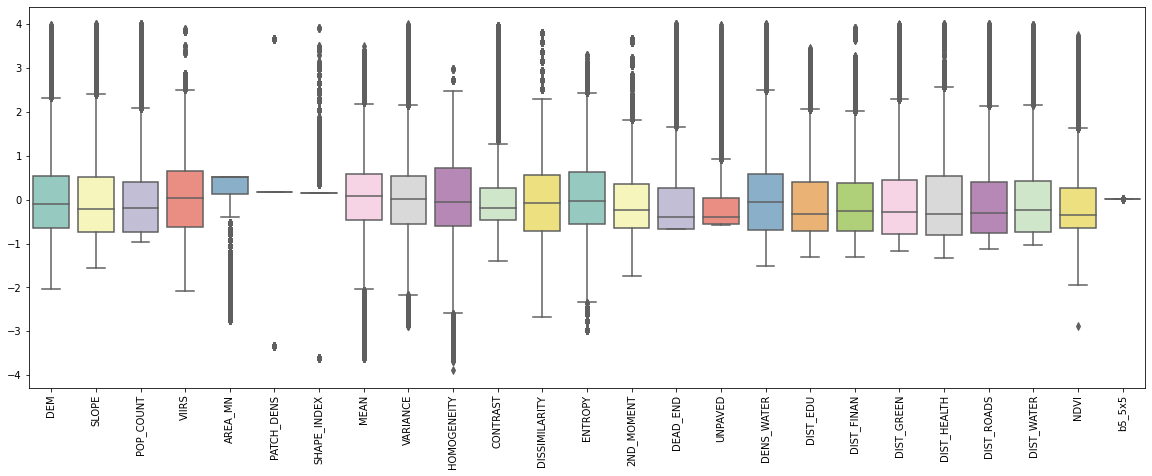

In [21]:
# Visualize modifications without outliers
plt.figure(figsize=(20,7))
sns.boxplot(data=new_df.iloc[:,12:37], palette='Set3')
plt.xticks(rotation=90)

In [78]:
# Save correlation table
df2.to_csv(r'C:\Users\Lorra\Documents\ITC\Thesis\filter\results\corr_t2_allvar.csv') 

### 4. Data modelling: k-means algorithm

In [12]:
# Import required libraries for clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp
from matplotlib import pyplot #visualization

#### Optimal k value

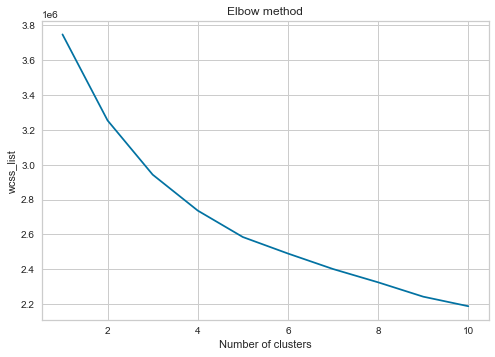

In [73]:
# Select the optimal k value (elbow method: inertia)
wcss_list= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data.iloc[:,12:37])
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1,11),wcss_list)
mtp.title('Elbow method')
mtp.xlabel('Number of clusters')
mtp.ylabel('wcss_list')
mtp.show()

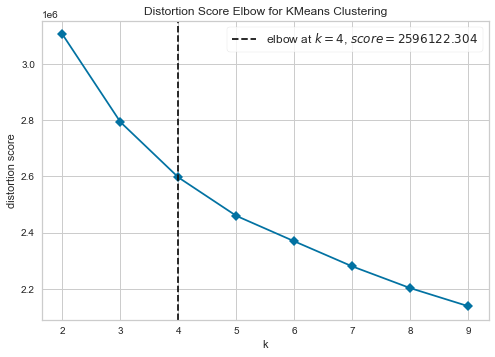

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Select the optimal k value (elbow method: distortion score)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans (random_state=0)
visualizer = KElbowVisualizer(model,k=(2,10),metric='silhouette', timings=False)
visualizer.fit(data.iloc[:,12:37])
visualizer.poof()

#### k-means training

The k-means model are trained and assessed visually 20 times for each experiment to ensure model consistency.

In [13]:
# Build and train the model
kmeans_new = KMeans(n_clusters=4)
kmeans_new.fit(df.iloc[:,12:37])

cluster_label = kmeans_new.predict(df.iloc[:,12:37]) 

In [14]:
print(cluster_label)
print(cluster_label.shape)

[1 1 1 ... 2 2 2]
(149947,)


In [15]:
# Assign new column with clustering results (categorical labels)
result = df.assign(cluster = cluster_label) 

In [16]:
print(result)

        grid_ID    OID_   O_IDD  ORIG_FID  BAND2  BAND3  BAND4  BAND5  BAND6  \
0       1757749       1       1         0    523    759    823   1015   1853   
1       1757750       2       2         1    479    700    703   1013   1670   
2       1757751       3       3         2    466    736    737   1040   2053   
3       1757752       4       4         3    292    649    529   1040   2348   
4       1760110       9       5         4    472    625    592    821   1368   
...         ...     ...     ...       ...    ...    ...    ...    ...    ...   
149942  8032085  200840  149943    149942    252    443    377    753   2002   
149943  8032086  200841  149944    149943    303    476    383    959   2406   
149944  8032087  200842  149945    149944    483    758    765   1104   2326   
149945  8032088  200843  149946    149945    428    668    669   1234   2052   
149946  8034449  200849  149947    149946    361    595    485    913   2264   

        BAND7  ...  DENS_WATER  DIST_ED

In [325]:
# Describe resulting table
result.describe()

,grid_ID,OID_,O_IDD,ORIG_FID,BAND2,BAND3,BAND4,BAND5,BAND6,BAND7,...,DENS_WATER,DIST_EDU,DIST_FINAN,DIST_GREEN,DIST_HEALTH,DIST_ROADS,DIST_WATER,NDVI,b5_5x5,cluster
count,1.499470e+05,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,149947.000000,...,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,1.499470e+05,149947.000000
mean,5.246140e+06,104240.232195,74974.000000,74973.000000,794.896497,1007.717040,1139.503271,1327.788245,1583.283073,1686.485432,...,1.819632e-17,5.458897e-17,4.003191e-16,-8.794890e-17,4.245809e-17,-1.516360e-18,2.426176e-17,-1.031125e-16,7.505983e-17,2.129839
std,1.485188e+06,60401.811915,43286.114744,43286.114744,283.194020,313.198458,393.364656,370.907360,427.548301,468.954102,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.953332
min,1.757749e+06,1.000000,1.000000,0.000000,40.000000,91.000000,63.000000,74.000000,81.000000,1.000000,...,-1.510002e+00,-1.310361e+00,-1.294985e+00,-1.169759e+00,-1.319448e+00,-1.128851e+00,-1.031466e+00,-2.869812e+00,-6.577980e+00,0.000000
25%,4.079378e+06,50512.500000,37487.500000,37486.500000,629.000000,816.000000,913.500000,1102.000000,1296.000000,1367.000000,...,-7.189457e-01,-7.045980e-01,-7.219685e-01,-7.602247e-01,-7.830741e-01,-7.547890e-01,-7.392481e-01,-6.532519e-01,-5.457197e-01,1.000000
50%,5.198329e+06,105841.000000,74974.000000,74973.000000,799.000000,999.000000,1136.000000,1301.000000,1507.000000,1591.000000,...,-6.502655e-02,-2.951259e-01,-2.759339e-01,-2.561820e-01,-2.961690e-01,-2.820332e-01,-2.245520e-01,-3.338977e-01,-8.809991e-02,2.000000
75%,6.603950e+06,155927.500000,112460.500000,112459.500000,964.000000,1190.000000,1361.000000,1520.000000,1801.000000,1926.000000,...,5.802991e-01,4.340536e-01,4.044724e-01,4.939280e-01,6.322522e-01,4.493197e-01,4.558714e-01,3.054513e-01,4.527234e-01,3.000000
max,8.034449e+06,206619.000000,149947.000000,149946.000000,5472.000000,5866.000000,6671.000000,6397.000000,6195.000000,6483.000000,...,4.596121e+00,4.215820e+00,5.366920e+00,5.236749e+00,4.325633e+00,4.827137e+00,7.203961e+00,3.805366e+00,8.523472e+00,3.000000


In [56]:
# Save results 
result.to_csv(r'C:\Users\Lorra\Documents\ITC\Thesis\kernel511\final_model5.csv') 

### 5. Visualize results

In [20]:
# Import packages
import geopandas as gpd
import shapefile as shp
import seaborn as sns

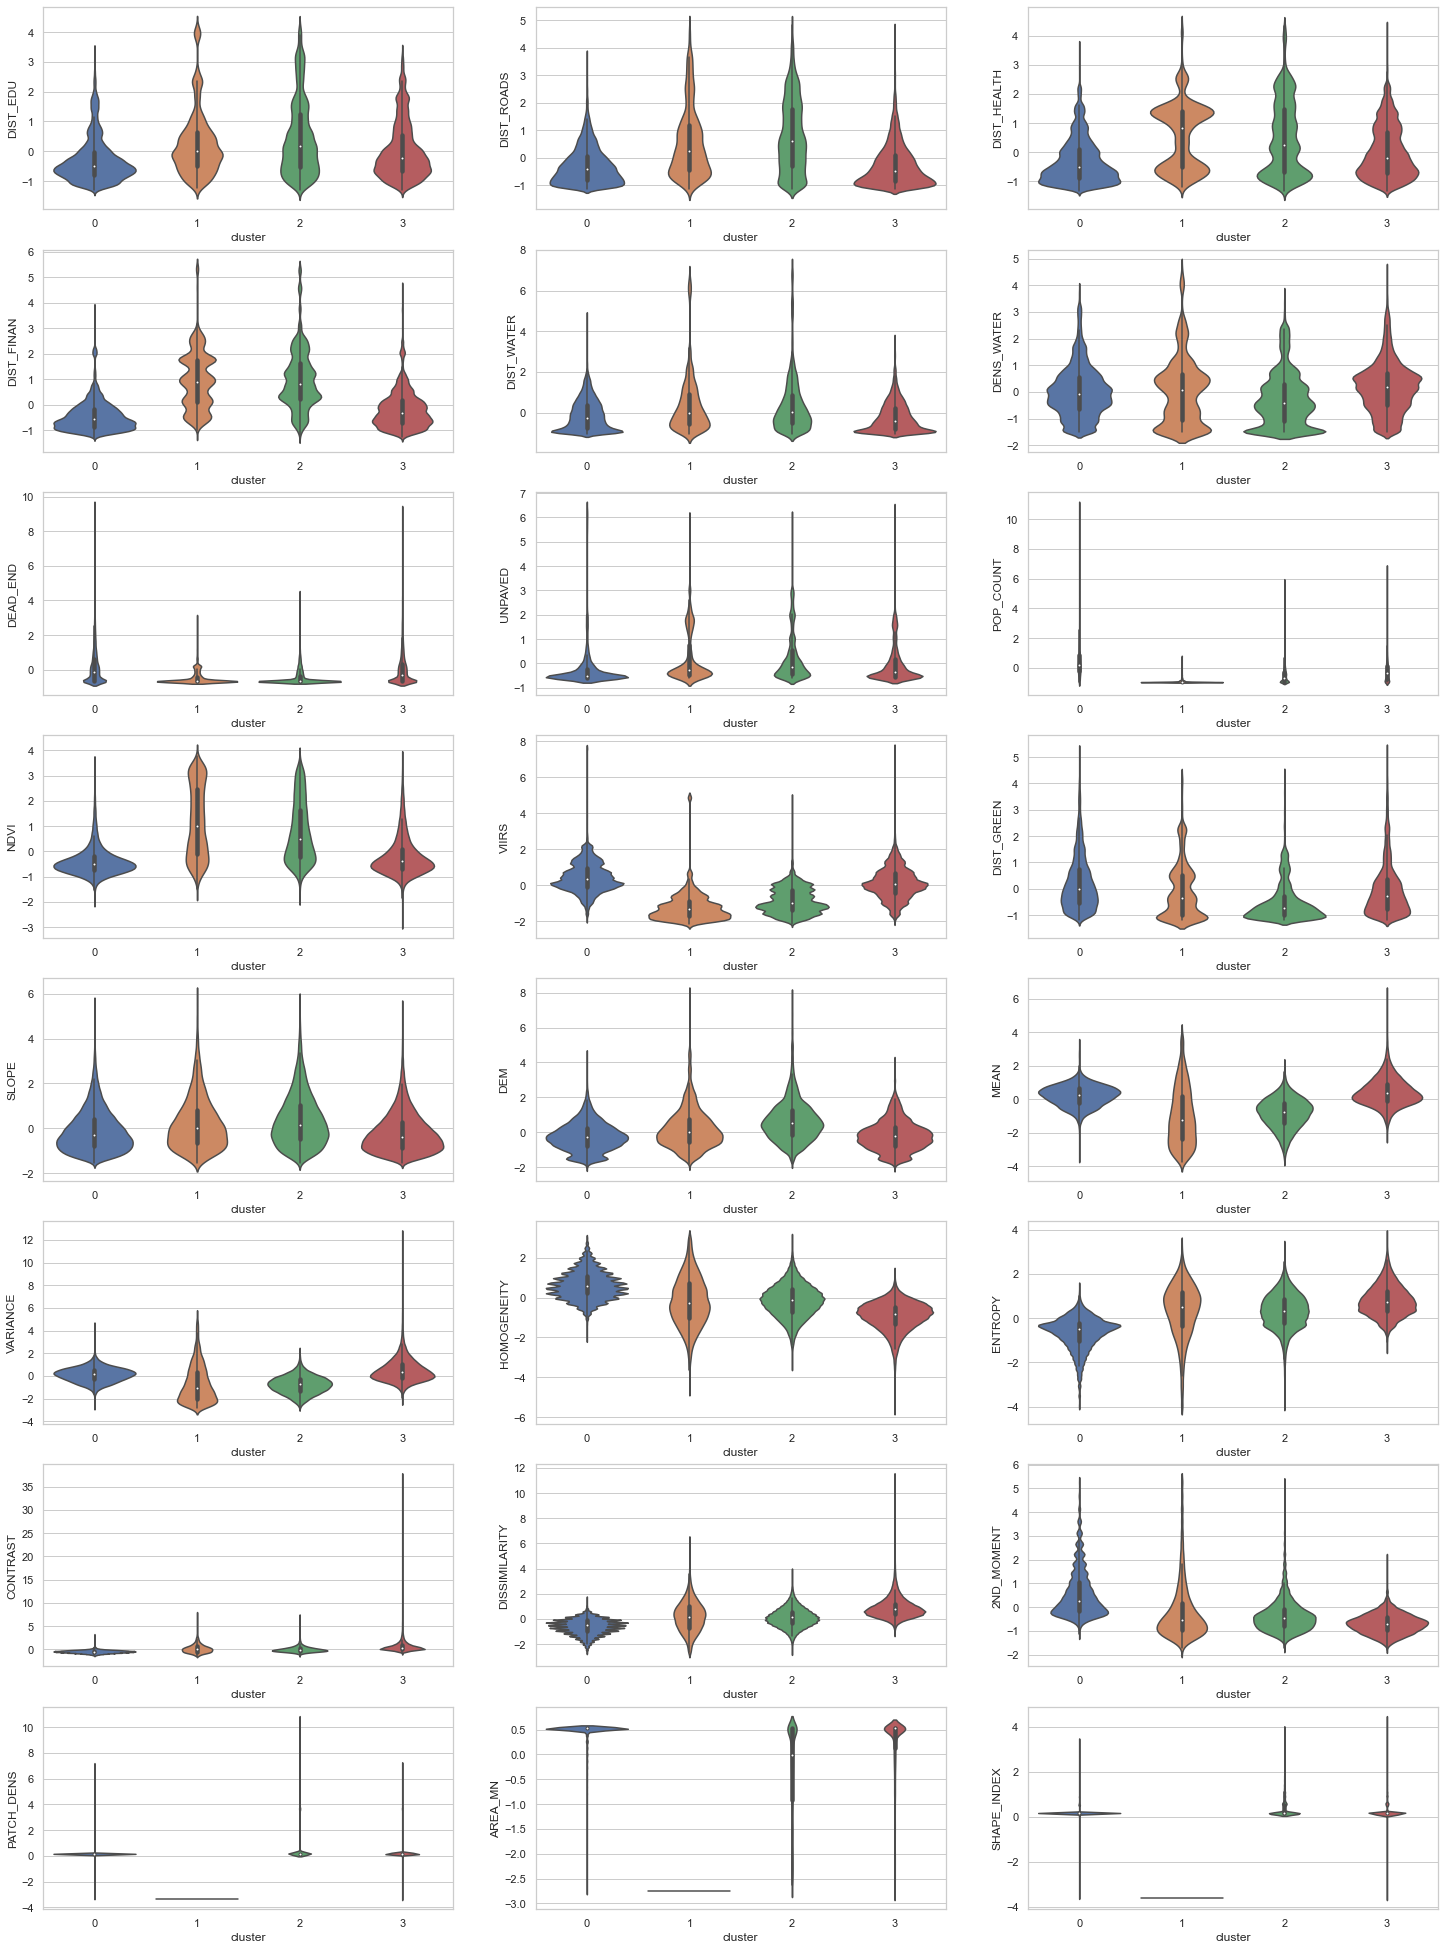

In [17]:
# Visualize results with violinplots
sns.set(style="whitegrid")
fig, ax = plt.subplots(8, 3)
fig.set_size_inches(25,35)
sns.set(style="whitegrid")

sns.violinplot(x = "cluster", y = "DIST_EDU", data = result, kind = "violin", inner = "box", ax = ax[0, 0]);
sns.violinplot(x = "cluster", y = "DIST_ROADS", data = result, kind = "violin", inner = "box", ax = ax[0, 1]);
sns.violinplot(x = "cluster", y = "DIST_HEALTH", data = result, kind = "violin", inner = "box", ax = ax[0, 2]);

sns.violinplot(x = "cluster", y = "DIST_FINAN", data = result, kind = "violin", inner = "box", ax = ax[1, 0]);
sns.violinplot(x = "cluster", y = "DIST_WATER", data = result, kind = "violin", inner = "box", ax = ax[1, 1]);
sns.violinplot(x = "cluster", y = "DENS_WATER", data = result, kind = "violin", inner = "box", ax = ax[1, 2]);

sns.violinplot(x = "cluster", y = "DEAD_END", data = result, kind = "violin", inner = "box", ax = ax[2, 0]);
sns.violinplot(x = "cluster", y = "UNPAVED", data = result, kind = "violin", inner = "box", ax = ax[2, 1]);
sns.violinplot(x = "cluster", y = "POP_COUNT", data = result, kind = "violin", inner = "box", ax = ax[2, 2]);

sns.violinplot(x = "cluster", y = "NDVI", data = result, kind = "violin", inner = "box", ax = ax[3, 0]);
sns.violinplot(x = "cluster", y = "VIIRS", data = result, kind = "violin", inner = "box", ax = ax[3, 1]);
sns.violinplot(x = "cluster", y = "DIST_GREEN", data = result, kind = "violin", inner = "box", ax = ax[3,2]);

sns.violinplot(x = "cluster", y = "SLOPE", data = result, kind = "violin", inner = "box", ax = ax[4, 0]);
sns.violinplot(x = "cluster", y = "DEM", data = result, kind = "violin", inner = "box", ax = ax[4, 1]);
sns.violinplot(x = "cluster", y = "MEAN", data = result, kind = "violin", inner = "box", ax = ax[4, 2]);

sns.violinplot(x = "cluster", y = "VARIANCE", data = result, kind = "violin", inner = "box", ax = ax[5, 0]);
sns.violinplot(x = "cluster", y = "HOMOGENEITY", data = result, kind = "violin", inner = "box", ax = ax[5, 1]);
sns.violinplot(x = "cluster", y = "ENTROPY", data = result, kind = "violin", inner = "box", ax = ax[5, 2]);

sns.violinplot(x = "cluster", y = "CONTRAST", data = result, kind = "violin", inner = "box", ax = ax[6, 0]);
sns.violinplot(x = "cluster", y = "DISSIMILARITY", data = result, kind = "violin", inner = "box", ax = ax[6, 1]);
sns.violinplot(x = "cluster", y = "2ND_MOMENT", data = result, kind = "violin", inner = "box", ax = ax[6, 2]);

sns.violinplot(x = "cluster", y = "PATCH_DENS", data = result, kind = "violin", inner = "box", ax = ax[7,0]);
sns.violinplot(x = "cluster", y = "AREA_MN", data = result, kind = "violin", inner = "box", ax = ax[7, 1]);
sns.violinplot(x = "cluster", y = "SHAPE_INDEX", data = result, kind = "violin", inner = "box", ax = ax[7, 2]);

fig.savefig('violinplots.png', dpi=300)

In [21]:
# Set new working path to save the clustering maps
BASE_PATH2 = r"C:\Users\Lorra\Documents\ITC\THESIS\data\final_clus"
os.chdir(BASE_PATH2)

In [22]:
# Spatially merge resulting output table with grid base layer using same key
file1 = 'grid_original.shp'
GEO = gpd.read_file(file1)

file2 = 'final_model5.csv'
DATA = pd.read_csv(file2) # <-- this should use pandas!!!

Join = pd.merge(GEO, DATA, left_on="grid_ID", right_on="grid_ID")

BASE_PATH3 = r"C:\Users\Lorra\Documents\ITC\THESIS\data\final_clus\model55"

# Write those rows into a new Shapefile (the default output file format is Shapefile)
Join.to_file(BASE_PATH3)

In [23]:
# Import geodataframe (shapefile)
gdf = gpd.read_file('C:/Users/lorra/Documents/ITC/THESIS/data/final_clus/model55/model55.shp')

In [24]:
# Read the shapefile
gdf.head()

,grid_ID,OID__x,O_IDD_x,Unnamed_ 0,OID__y,O_IDD_y,ORIG_FID,BAND2,BAND3,BAND4,...,DIST_EDU,DIST_FINAN,DIST_GREEN,DIST_HEALT,DIST_ROADS,DIST_WATER,NDVI,b5_5x5,cluster,geometry
0,1757749,1,1,0,1,1,0,523,759,823,...,1.829696,5.366920,-0.817548,-0.613755,1.651565,-0.044554,1.299150,-1.960181,3,"POLYGON ((321785.890 7358620.458, 321785.890 7..."
1,1757750,2,2,1,2,2,1,479,700,703,...,1.815138,5.363463,-0.789111,-0.623191,1.628191,-0.081755,1.579998,-1.876977,3,"POLYGON ((321805.890 7358620.458, 321805.890 7..."
2,1757751,3,3,2,3,3,2,466,736,737,...,1.800596,5.360005,-0.760225,-0.632519,1.605897,-0.117554,1.739302,-1.876977,3,"POLYGON ((321825.890 7358620.458, 321825.890 7..."
3,1757752,4,4,3,4,4,3,292,649,529,...,1.786062,5.356547,-0.730978,-0.641732,1.584711,-0.151772,2.674124,-1.960181,3,"POLYGON ((321845.890 7358620.458, 321845.890 7..."
4,1760110,9,5,4,9,5,4,472,625,592,...,1.838848,5.362469,-0.859494,-0.595712,1.622475,0.028456,1.538269,-1.585765,3,"POLYGON ((321765.890 7358640.458, 321765.890 7..."


In [37]:
# Count possible missing values
gdf.isnull().sum().sort_values(ascending=False).head()

grid_ID       0
patch_dens    0
mean          0
variance      0
homogeneit    0
dtype: int64

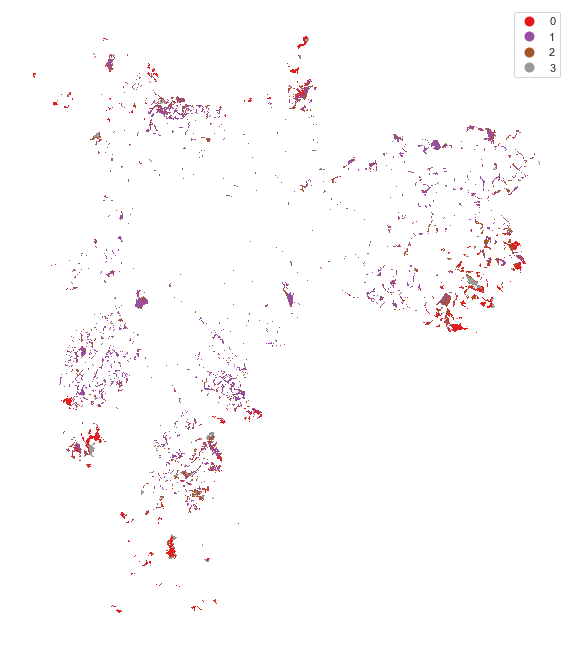

In [25]:
# Visualize the shapefile
f, ax = plt.subplots(1, figsize=(10,20))

gdf.plot(column='cluster', categorical=True, cmap= 'Set1', legend=True, linewidth=0.1, edgecolor='none', ax=ax)

ax.set_axis_off()

plt.show()